In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN
from sklearn.model_selection import train_test_split


C:\Users\riakh\AppData\Local\Temp\ipykernel_33704\1733315983.py:6: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


In [2]:
import os

dataset_dir = "C:\\Users\\Hp\\Downloads\\archive (4)\\chest_xray"

for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        # Print the complete path to each file in the dataset
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
def create_dataframe(folder_path, label, result):
    filenames = os.listdir(folder_path)
    full_paths = [os.path.join(folder_path, filename) for filename in filenames if not filename.startswith('.DS_Store')]
    dataframe = pd.DataFrame({
        "Filename": full_paths,
        "Label": label,
        "Chest X-Ray": result
    })
    return dataframe

# creating dataframe for training and testing data
folder_path = "C:\\Users\\Hp\\Downloads\\archive (4)\\chest_xray\\chest_xray"

train_normal_path = "C:\\Users\\Hp\\Downloads\\archive (4)\\chest_xray\\chest_xray\\train\\NORMAL"
df_train = create_dataframe(train_normal_path, 'train', 'Normal')

train_pneumonia_path = "C:\\Users\\Hp\\Downloads\\archive (4)\\chest_xray\\chest_xray\\train\\PNEUMONIA"
df_train = pd.concat([df_train, create_dataframe(train_pneumonia_path, 'train', 'Pneumonia')])
df_train

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Hp\\Downloads\\archive (4)\\chest_xray\\chest_xray\\train\\NORMAL'

: 

In [64]:
test_normal_path = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\test\\NORMAL"
df_test = create_dataframe(test_normal_path, 'test', 'Normal')

test_pneumonia_path = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\test\\PNEUMONIA"
df_test = pd.concat([df_test, create_dataframe(test_pneumonia_path, 'test', 'Pneumonia')])
df_test

,Filename,Label,Chest X-Ray
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Normal
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Normal
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Normal
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Normal
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Normal
...,...,...,...
385,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Pneumonia
386,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Pneumonia
387,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Pneumonia
388,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Pneumonia


In [65]:
val_normal_path = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\val\\NORMAL"
df_val = create_dataframe(val_normal_path, 'val', 'Normal')

val_pneumonia_path = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\val\\PNEUMONIA"
df_val = pd.concat([df_val, create_dataframe(val_pneumonia_path, 'val', 'Pneumonia')])
df_val

,Filename,Label,Chest X-Ray
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
5,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
6,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
7,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia


In [66]:
train_normal_img = df_train[df_train['Label'] == 'train'][df_train['Chest X-Ray'] == 'Normal']['Filename']

In [67]:
import matplotlib.pyplot as plt
import cv2

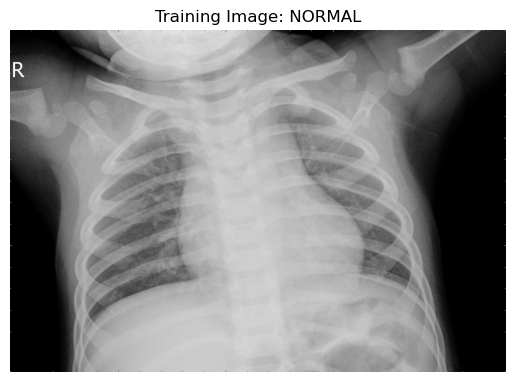

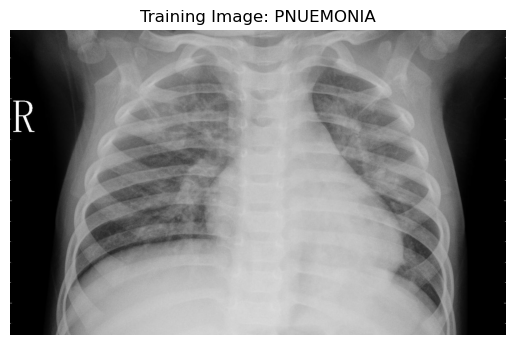

In [68]:
import os

first_normal_image_filename = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\train\\NORMAL\\NORMAL2-IM-1400-0001.jpeg"
first_pneumonia_image_filename = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\train\\PNEUMONIA\\person1009_virus_1694.jpeg"
if os.path.exists(first_normal_image_filename):
    img_normal = cv2.imread(first_normal_image_filename)
    plt.imshow(cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB))
    plt.title('Training Image: NORMAL')
    plt.axis('off')
    plt.show()
else:
    print('The image does not exist.')
if os.path.exists(first_pneumonia_image_filename):
    img_normal = cv2.imread(first_pneumonia_image_filename)
    plt.imshow(cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB))
    plt.title('Training Image: PNUEMONIA')
    plt.axis('off')
    plt.show()
else:
    print('The image does not exist.')    
    

In [69]:
from sklearn.model_selection import train_test_split

df = pd.concat([df_train, df_test, df_val])
df['result'] = (df['Chest X-Ray'] == 'Pneumonia')
df

,Filename,Label,Chest X-Ray,result
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,False
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,False
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,False
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,False
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,False
...,...,...,...,...
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,True
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,True
5,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,True
6,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,True


In [70]:
df['result'].replace(True, 1, inplace=True)
df['result'].replace(False, 0, inplace=True)
df

,Filename,Label,Chest X-Ray,result
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
...,...,...,...,...
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1
5,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1
6,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1


In [71]:
l1, l2, l3 = len(df_train), len(df_train)+len(df_test), len(df_train)+len(df_test)+len(df_val)
train, test, val = df.iloc[:l1, :], df.iloc[l1:l2, :], df.iloc[l2:,:]
val

,Filename,Label,Chest X-Ray,result
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
5,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
6,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
7,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1


In [72]:
IMG_WIDTH = 2
IMG_HEIGHT = 4

In [73]:
import numpy as np
from PIL import Image
data_xx = df_train['Filename'].iloc[:].to_numpy()
images = []
for i in range(len(df_train)):
    image = cv2.cvtColor(cv2.imread(data_xx[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = (cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)))/255.
    images.append(img)

In [74]:
import numpy as np
images = np.asarray(images)
print(images.shape)

(5216, 4, 2)


In [75]:
data_yy = df['result'].iloc[:l1]
result = np.array(data_yy)

In [76]:
print(result.shape)

(5216,)


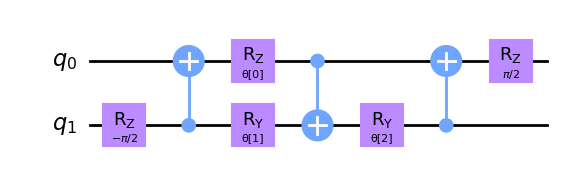

In [77]:
# Define a two qubit unitary 
def conv_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)
    target.cx(1, 0)
    target.rz(np.pi / 2, 0)
    return target


#Draw the circuit
params = ParameterVector("θ", length=3)
circuit = conv_circuit(params)
circuit.draw("mpl")

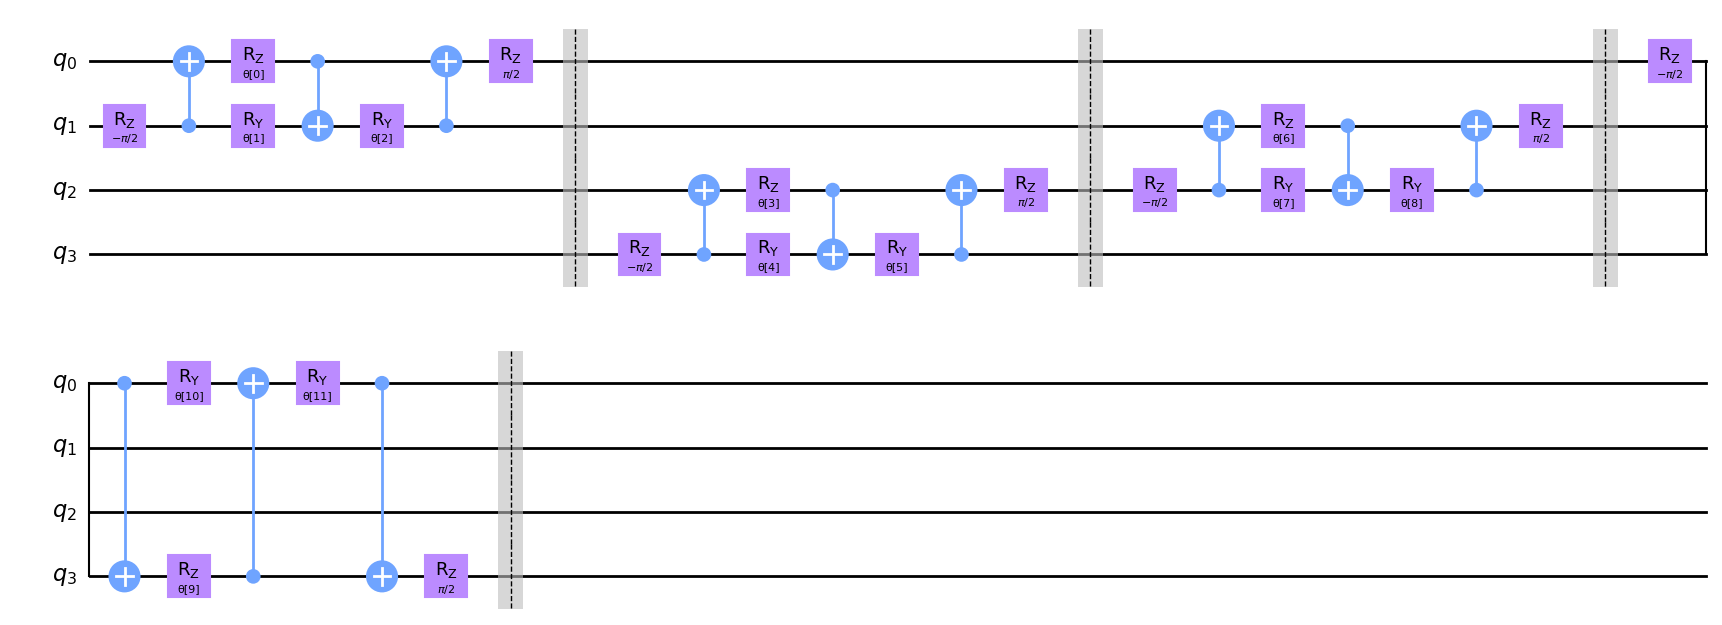

In [78]:
def conv_layer(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 3)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)
    return qc


circuit = conv_layer(4, "θ")
circuit.decompose().draw("mpl")

In [79]:
from qiskit import QuantumCircuit

def conv_layer_size(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 3)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)

    # Calculate the size of the convolutional layer
    conv_layer_size = len(qc.decompose())
    return conv_layer_size

circuit_size = conv_layer_size(4, "θ")
print("Size of the convolutional layer:", circuit_size)


Size of the convolutional layer: 36


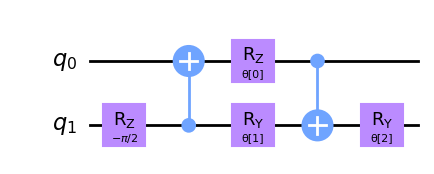

In [80]:
def pool_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)

    return target


params = ParameterVector("θ", length=3)
circuit = pool_circuit(params)
circuit.draw("mpl")

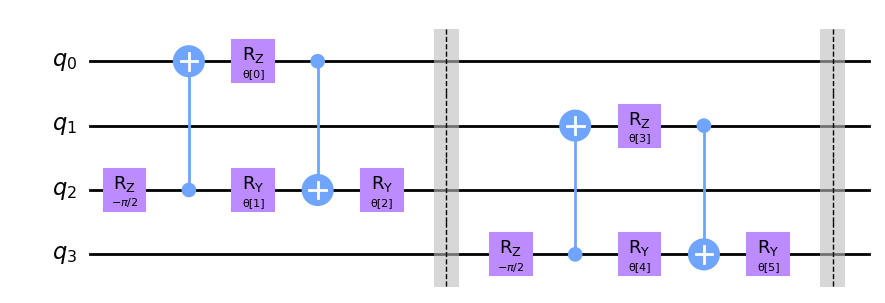

In [81]:
def pool_layer(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, range(num_qubits))
    return qc


sources = [0, 1]
sinks = [2, 3]
circuit = pool_layer(sources, sinks, "θ")
circuit.decompose().draw("mpl")

In [82]:
from qiskit import QuantumCircuit

def pool_layer_size(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    # Calculate the size of the pool layer
    pool_layer_size = len(qc)
    return pool_layer_size

sources = [0, 1]
sinks = [2, 3]
param_prefix = "θ"
size = pool_layer_size(sources, sinks, param_prefix)
print("Size of the pool layer:", size)

Size of the pool layer: 14


In [83]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.15)

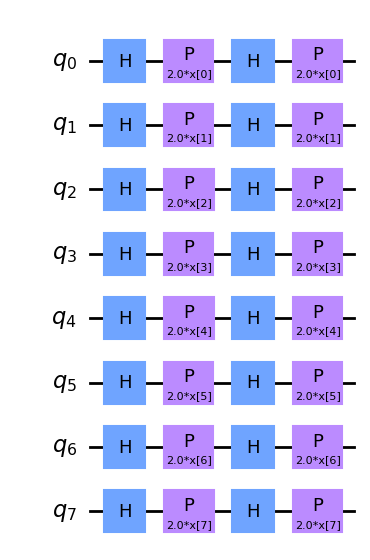

In [84]:
feature_map = ZFeatureMap(8)
feature_map.decompose().draw("mpl")

In [195]:
pip install tensorflow



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/fb/59/3eb58629e3749d9f4fc1e522487af369f9bd4c451f465d3054961fab6bf8/tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.p

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
azure-core 1.29.4 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
filelock 3.12.3 requires typing-extensions>=4.7.1; python_version < "3.11", but you have typing-extensions 4.5.0 which is incompatible.


In [85]:

from tensorflow.keras.layers import Dense

In [86]:
feature_map = ZFeatureMap(8)

ansatz = QuantumCircuit(8, name="Ansatz")

# First Convolutional Layer
ansatz.compose(conv_layer(8, "с1"), list(range(8)), inplace=True)

# First Pooling Layer
ansatz.compose(pool_layer([0, 1, 2, 3], [4, 5, 6, 7], "p1"), list(range(8)), inplace=True)

# Second Convolutional Layer
ansatz.compose(conv_layer(4, "c2"), list(range(4, 8)), inplace=True)

# Second Pooling Layer
ansatz.compose(pool_layer([0, 1], [2, 3], "p2"), list(range(4, 8)), inplace=True)

# Third Convolutional Layer
ansatz.compose(conv_layer(2, "c3"), list(range(6, 8)), inplace=True)

# Third Pooling Layer
ansatz.compose(pool_layer([0], [1], "p3"), list(range(6, 8)), inplace=True)

# Combining the feature map and ansatz
circuit = QuantumCircuit(8)
circuit.compose(feature_map, range(8), inplace=True)
circuit.compose(ansatz, range(8), inplace=True)

observable = SparsePauliOp.from_list([("Z" + "I" * 7, 1)])

# we decompose the circuit for the QNN to avoid additional data copying
qnn = EstimatorQNN(
    circuit=circuit.decompose(),
    observables=observable,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
)


In [87]:
print(qnn.output_shape)

(1,)


In [88]:
print(qnn.input_gradients)

False


In [89]:
print(qnn.input_params)

[ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3]), ParameterVectorElement(x[4]), ParameterVectorElement(x[5]), ParameterVectorElement(x[6]), ParameterVectorElement(x[7])]


In [90]:
print(qnn.num_inputs)

8


In [91]:
print(qnn.num_weights)

63


In [92]:
output_shape = qnn.output_shape
print(output_shape)


(1,)


In [93]:
print(ansatz.parameters)

ParameterView([ParameterVectorElement(c2[0]), ParameterVectorElement(c2[1]), ParameterVectorElement(c2[2]), ParameterVectorElement(c2[3]), ParameterVectorElement(c2[4]), ParameterVectorElement(c2[5]), ParameterVectorElement(c2[6]), ParameterVectorElement(c2[7]), ParameterVectorElement(c2[8]), ParameterVectorElement(c2[9]), ParameterVectorElement(c2[10]), ParameterVectorElement(c2[11]), ParameterVectorElement(c3[0]), ParameterVectorElement(c3[1]), ParameterVectorElement(c3[2]), ParameterVectorElement(c3[3]), ParameterVectorElement(c3[4]), ParameterVectorElement(c3[5]), ParameterVectorElement(p1[0]), ParameterVectorElement(p1[1]), ParameterVectorElement(p1[2]), ParameterVectorElement(p1[3]), ParameterVectorElement(p1[4]), ParameterVectorElement(p1[5]), ParameterVectorElement(p1[6]), ParameterVectorElement(p1[7]), ParameterVectorElement(p1[8]), ParameterVectorElement(p1[9]), ParameterVectorElement(p1[10]), ParameterVectorElement(p1[11]), ParameterVectorElement(p2[0]), ParameterVectorEleme

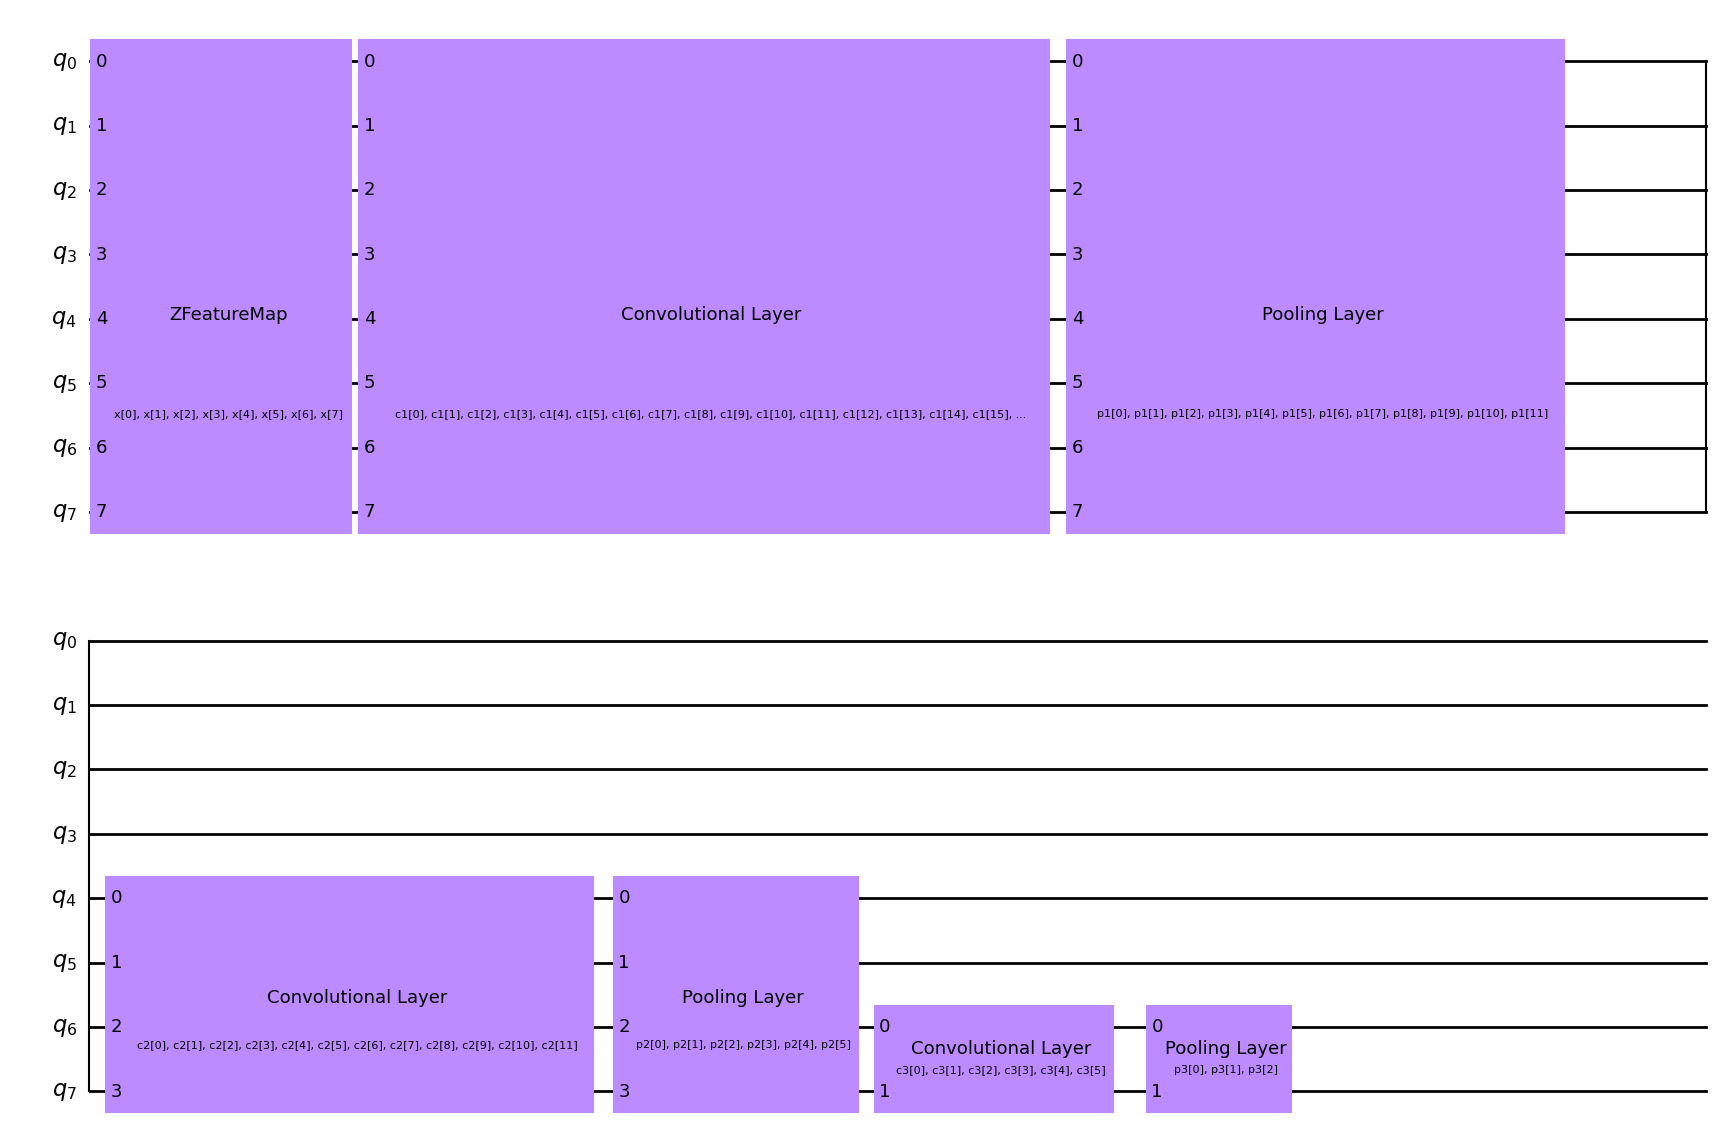

In [94]:
circuit.draw("mpl")

In [110]:
objective_func_vals = []

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [111]:
x = np.array(images_train)
y = np.array(result_train)

In [112]:
x_reshaped = x.reshape(4433, 8)

In [123]:
print(images_test.shape)

(783, 4, 2)


In [125]:
images_test_reshaped = images_test.reshape(783, 8)

In [126]:
print(images_test_reshaped.shape)

(783, 8)


In [113]:
print(x_reshaped.shape)

(4433, 8)


In [114]:
print(x.shape)

(4433, 4, 2)


In [115]:
print(y.shape)

(4433,)


In [116]:
print(images_train.shape)

(4433, 4, 2)


In [117]:
print(result_train.shape)

(4433,)


In [118]:
print(np.unique(y))

[0 1]


In [119]:
print("Input data shape:", x.shape)
print("Target labels shape:", y.shape)
print("Unique target labels:", np.unique(y))


Input data shape: (4433, 4, 2)
Target labels shape: (4433,)
Unique target labels: [0 1]


In [120]:
unique_values = np.unique(y)

# Check the unique values
if len(unique_values) == 2 and set(unique_values) == {0, 1}:
    print("Binary classification")
else:
    print("Multi-class classification")

Binary classification


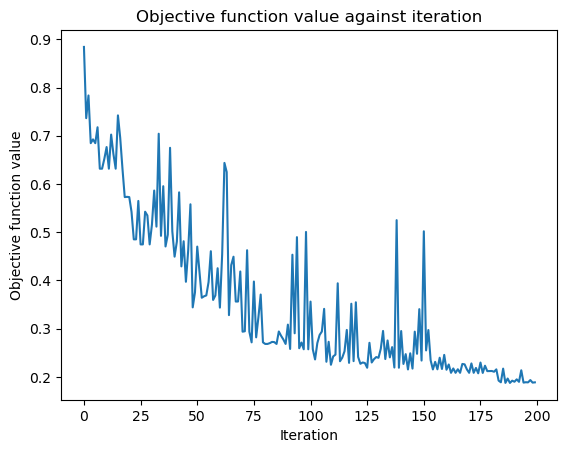

In [121]:
import numpy as np

# Generate random initial values for 63 parameters
initial_values = np.random.rand(63)

# Create the initial_point_array
initial_point_array = np.array(initial_values)

classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=200),  # Set max iterations
    callback=callback_graph,
    initial_point=initial_point_array,  # Use the NumPy array
)

# Fit the classifier
classifier.fit(x_reshaped, y)


In [127]:
predictions = classifier.predict(images_test_reshaped)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(result_test, predictions)
report = classification_report(result_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7535121328224776
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       193
           1       0.75      1.00      0.86       590

    accuracy                           0.75       783
   macro avg       0.38      0.50      0.43       783
weighted avg       0.57      0.75      0.65       783



C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.30)

In [129]:
x = np.array(images_train)
y = np.array(result_train)

In [130]:
print(x.shape)

(3651, 4, 2)


In [132]:
x_reshaped = x.reshape(3651, 8)
print(x_reshaped.shape)

(3651, 8)


In [133]:
print(y.shape)

(3651,)


In [136]:
print(images_test.shape)

(1565, 4, 2)


In [138]:
images_test_reshaped = images_test.reshape(1565, 8)

In [139]:
print(images_test_reshaped.shape)

(1565, 8)


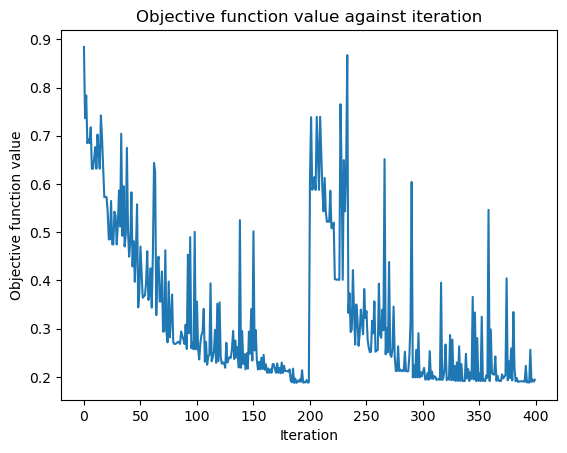

In [134]:
import numpy as np

# Generate random initial values for 63 parameters
initial_values = np.random.rand(63)

# Create the initial_point_array
initial_point_array = np.array(initial_values)

classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=200),  # Set max iterations
    callback=callback_graph,
    initial_point=initial_point_array,  # Use the NumPy array
)

# Fit the classifier
classifier.fit(x_reshaped, y)


In [140]:
predictions = classifier.predict(images_test_reshaped)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(result_test, predictions)
report = classification_report(result_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7354632587859425
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       414
           1       0.74      1.00      0.85      1151

    accuracy                           0.74      1565
   macro avg       0.37      0.50      0.42      1565
weighted avg       0.54      0.74      0.62      1565



C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.40)

In [142]:
x = np.array(images_train)
y = np.array(result_train)

In [143]:
print(x.shape)

(3129, 4, 2)


In [145]:
x_reshaped = x.reshape(3129, 8)
print(x_reshaped.shape)

(3129, 8)


In [146]:
print(y.shape)

(3129,)


In [147]:
print(images_test.shape)

(2087, 4, 2)


In [149]:
images_test_reshaped = images_test.reshape(2087, 8)

In [150]:
print(images_test_reshaped.shape)

(2087, 8)


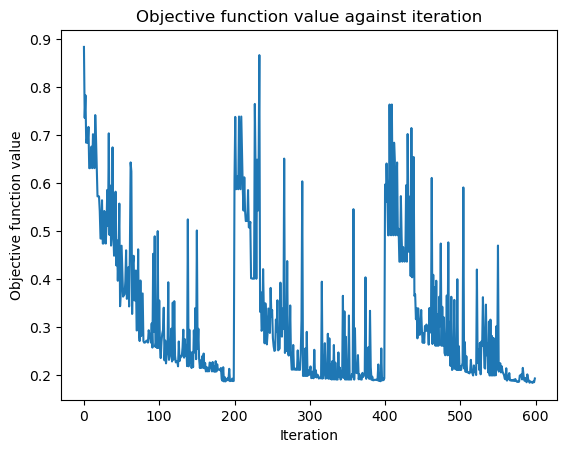

In [151]:
import numpy as np

# Generate random initial values for 63 parameters
initial_values = np.random.rand(63)

# Create the initial_point_array
initial_point_array = np.array(initial_values)

classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=200),  # Set max iterations
    callback=callback_graph,
    initial_point=initial_point_array,  # Use the NumPy array
)

# Fit the classifier
classifier.fit(x_reshaped, y)


In [152]:
predictions = classifier.predict(images_test_reshaped)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(result_test, predictions)
report = classification_report(result_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7345471969333972
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       554
           1       0.73      1.00      0.85      1533

    accuracy                           0.73      2087
   macro avg       0.37      0.50      0.42      2087
weighted avg       0.54      0.73      0.62      2087



C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [153]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.50)

In [154]:
x = np.array(images_train)
y = np.array(result_train)

In [155]:
print(y.shape)

(2608,)


In [163]:
x_reshaped = x.reshape(2608, 8)
print(x_reshaped.shape)

(2608, 8)


In [156]:
print(images_test.shape)

(2608, 4, 2)


In [158]:
images_test_reshaped = images_test.reshape(2608, 8)

In [159]:
print(images_test_reshaped.shape)

(2608, 8)


In [161]:
print(y.shape)

(2608,)


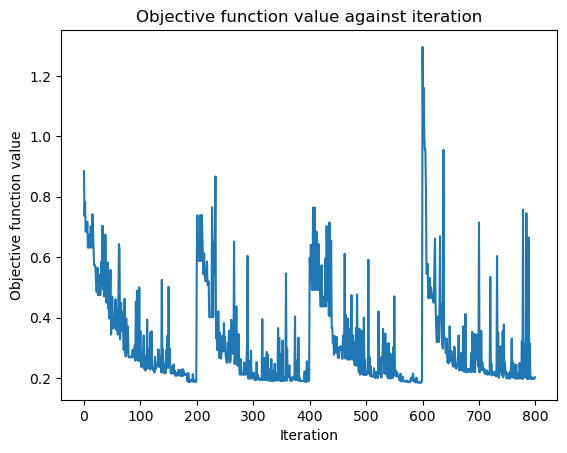

In [164]:
import numpy as np

# Generate random initial values for 63 parameters
initial_values = np.random.rand(63)

# Create the initial_point_array
initial_point_array = np.array(initial_values)

classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=200),  # Set max iterations
    callback=callback_graph,
    initial_point=initial_point_array,  # Use the NumPy array
)

# Fit the classifier
classifier.fit(x_reshaped, y)


In [165]:
predictions = classifier.predict(images_test_reshaped)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(result_test, predictions)
report = classification_report(result_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7526840490797546
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       645
           1       0.75      1.00      0.86      1963

    accuracy                           0.75      2608
   macro avg       0.38      0.50      0.43      2608
weighted avg       0.57      0.75      0.65      2608



C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
import numpy as np
import tensorflow as tf
import qiskit as qk
from qiskit.visualization import circuit_drawer
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

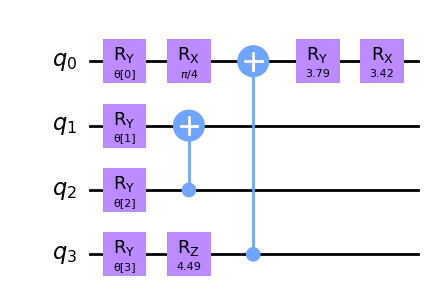

In [12]:
# Define the quantum convolutional layer circuit
def create_quantum_convolution_circuit(params):
    qc = QuantumCircuit(4)
    qc.ry(params[0], 0)
    qc.ry(params[1], 1)
    qc.ry(params[2], 2)
    qc.ry(params[3], 3)
    qc.rx(np.pi / 4, 0)
    qc.cx(2, 1)
    qc.rz(4.49, 3)
    qc.cx(3, 0)
    qc.ry(3.79, 0)
    qc.rx(3.42, 0)
    return qc
params = ParameterVector("θ", length=4)
circuit = create_quantum_convolution_circuit(params)
circuit.draw("mpl")

In [16]:
# Define the QCNN model
def create_qcnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(8, 8)),
        
        # Quantum Convolutional Layer
        tf.keras.layers.Lambda(lambda x: np.array([create_quantum_convolution_circuit(params)])),
        
        # Classical Convolutional Layer
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        
        # Max Pooling Layer
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Flatten Layer
        tf.keras.layers.Flatten(),
        
        # Dense Layer
        tf.keras.layers.Dense(128, activation='relu'),
        
        # Dropout Layer
        tf.keras.layers.Dropout(0.0),
        
        # Output Layer
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    return model

In [40]:
pip install scikit-quant

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installi

In [181]:
feature_map = ZFeatureMap(16)

ansatz = QuantumCircuit(16, name="Ansatz")

# First Convolutional Layer
ansatz.compose(conv_layer(16, "с1"), list(range(16)), inplace=True)

# First Pooling Layer
ansatz.compose(pool_layer([0, 1, 2, 3, 4, 5, 6, 7 ], [8, 9, 10, 11, 12, 13, 14, 15], "p1"), list(range(16)), inplace=True)

# Second Convolutional Layer
ansatz.compose(conv_layer(8, "c2"), list(range(8, 16)), inplace=True)

# Second Pooling Layer
ansatz.compose(pool_layer([0, 1, 2, 3], [4, 5, 6, 7], "p2"), list(range(8, 16)), inplace=True)

# Third Convolutional Layer
ansatz.compose(conv_layer(4, "c3"), list(range(12, 16)), inplace=True)

# Third Pooling Layer
ansatz.compose(pool_layer([0, 1], [2, 3], "p3"), list(range(12, 16)), inplace=True)

# Fourth Convolutional Layer
ansatz.compose(conv_layer(2, "c4"), list(range(14, 16)), inplace=True)

# Fourth Pooling Layer
ansatz.compose(pool_layer([0], [1], "p4"), list(range(14, 16)), inplace=True)


# Combining the feature map and ansatz
circuit = QuantumCircuit(16)
circuit.compose(feature_map, range(16), inplace=True)
circuit.compose(ansatz, range(16), inplace=True)  

In [188]:
observable = SparsePauliOp.from_list([("Z" + "I" * 15, 1)])

# we decompose the circuit for the QNN to avoid additional data copying
qnn = EstimatorQNN(
    circuit=circuit.decompose(),
    observables=observable,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
)


In [183]:
num_qubits_circuit = circuit.num_qubits
print(f"Number of qubits in the circuit: {num_qubits_circuit}")

# Check the number of qubits in the feature map
num_qubits_feature_map = feature_map.num_qubits
print(f"Number of qubits in the feature map: {num_qubits_feature_map}")

Number of qubits in the circuit: 16
Number of qubits in the feature map: 16
